In [1]:
# Basic utility libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer #

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import random

# Model training/testing 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#neural network
from keras.preprocessing.text import Tokenizer

2023-03-18 22:20:28.467026: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [167]:
raw_data = pd.read_csv('Student Major fit Alumni (Responses) - Form responses 1.csv')
raw_data
cols = {'Timestamp', 
        '1. Would you like to take part in this study?',
        '1. What gender do you identify as?',
        '2. How old are you?',
        '4. How many languages do you speak?',
        '2. What year did you graduate from University?',
        '8. What are some of the things you wish someone had told you prior to choosing this major?',
        '2. Do you feel motivated to go to work?',
        '1. If you had the courage would you quit?',
        '2. What would make you more motivated to continue?',
        '2. What is your level of education?',
        '3. What is your nationality?',
        '5. Where do you currently live?',
        
       }
raw_data = raw_data.drop(cols, axis = 1)
raw_data = raw_data.dropna()
raw_data

,5. Are you an Alumni?,6. What University did you attend?,1. What was your major of choice?,Did you change your major during the course of your studies?,3. What made you choose this major?,What did you like the most about your major?,4. Are you currently working in your major field? Or in something related to it?,4. Do you like your job?,5. Do you regret your study field/major of choice?,6. If you had to make another major choice what would it be?,7. Would you advise others to make the same choice?,1. Are you satisfied with your job?
2,Yes,Lebanese American University,Computer science,No,Interest in the major,Being an introvert is not frowned upon,Yes,Yes,No,Prostitution,No,No
3,Yes,LAU,Computer Science,No,"Pressure (Peer, Society,...)",The mathematical and the problem solving aspect.,Yes,Yes,Maybe,Archeology,Yes,Yes
4,Yes,LAU,Civil engineering,No,Interest in the major,My position in the field,Yes,Yes,No,Business,Yes,Yes
5,Yes,LAU,Computer science,No,Interest in the major,"All the critical thinking that we need to to, ...",Maybe,Yes,No,"Psychology, or i would study a specific field ...",Yes,Maybe
6,Yes,Instituto de Empresa Universidad,Dual Bachelors in Business Administration and ...,No,Challenge/Intrigue,It has provided experience unlike anywhere I c...,Maybe,Yes,Maybe,Hard science/mathematics and econometrics,No,Maybe
...,...,...,...,...,...,...,...,...,...,...,...,...
142,Yes,LAU,Information technology management,Yes,Interest in the major,The courses and the drs,Yes,Yes,No,Sonething related to food,Yes,Maybe
143,Yes,USJ,Education,No,Interest in the major,The importance of the major,Yes,Yes,No,Counseling,Yes,Maybe
146,Yes,Lebanese university,Law,No,Interest in the major,The,Yes,Yes,Maybe,Psychology,Yes,Yes
147,Yes,LAU,Mechanical engineering,No,Interest in the major,Course Subjects,Yes,Yes,No,Financial Engineering,Yes,Yes


In [168]:
raw_data

,5. Are you an Alumni?,6. What University did you attend?,1. What was your major of choice?,Did you change your major during the course of your studies?,3. What made you choose this major?,What did you like the most about your major?,4. Are you currently working in your major field? Or in something related to it?,4. Do you like your job?,5. Do you regret your study field/major of choice?,6. If you had to make another major choice what would it be?,7. Would you advise others to make the same choice?,1. Are you satisfied with your job?
2,Yes,Lebanese American University,Computer science,No,Interest in the major,Being an introvert is not frowned upon,Yes,Yes,No,Prostitution,No,No
3,Yes,LAU,Computer Science,No,"Pressure (Peer, Society,...)",The mathematical and the problem solving aspect.,Yes,Yes,Maybe,Archeology,Yes,Yes
4,Yes,LAU,Civil engineering,No,Interest in the major,My position in the field,Yes,Yes,No,Business,Yes,Yes
5,Yes,LAU,Computer science,No,Interest in the major,"All the critical thinking that we need to to, ...",Maybe,Yes,No,"Psychology, or i would study a specific field ...",Yes,Maybe
6,Yes,Instituto de Empresa Universidad,Dual Bachelors in Business Administration and ...,No,Challenge/Intrigue,It has provided experience unlike anywhere I c...,Maybe,Yes,Maybe,Hard science/mathematics and econometrics,No,Maybe
...,...,...,...,...,...,...,...,...,...,...,...,...
142,Yes,LAU,Information technology management,Yes,Interest in the major,The courses and the drs,Yes,Yes,No,Sonething related to food,Yes,Maybe
143,Yes,USJ,Education,No,Interest in the major,The importance of the major,Yes,Yes,No,Counseling,Yes,Maybe
146,Yes,Lebanese university,Law,No,Interest in the major,The,Yes,Yes,Maybe,Psychology,Yes,Yes
147,Yes,LAU,Mechanical engineering,No,Interest in the major,Course Subjects,Yes,Yes,No,Financial Engineering,Yes,Yes


In [169]:
df = raw_data
df

,5. Are you an Alumni?,6. What University did you attend?,1. What was your major of choice?,Did you change your major during the course of your studies?,3. What made you choose this major?,What did you like the most about your major?,4. Are you currently working in your major field? Or in something related to it?,4. Do you like your job?,5. Do you regret your study field/major of choice?,6. If you had to make another major choice what would it be?,7. Would you advise others to make the same choice?,1. Are you satisfied with your job?
2,Yes,Lebanese American University,Computer science,No,Interest in the major,Being an introvert is not frowned upon,Yes,Yes,No,Prostitution,No,No
3,Yes,LAU,Computer Science,No,"Pressure (Peer, Society,...)",The mathematical and the problem solving aspect.,Yes,Yes,Maybe,Archeology,Yes,Yes
4,Yes,LAU,Civil engineering,No,Interest in the major,My position in the field,Yes,Yes,No,Business,Yes,Yes
5,Yes,LAU,Computer science,No,Interest in the major,"All the critical thinking that we need to to, ...",Maybe,Yes,No,"Psychology, or i would study a specific field ...",Yes,Maybe
6,Yes,Instituto de Empresa Universidad,Dual Bachelors in Business Administration and ...,No,Challenge/Intrigue,It has provided experience unlike anywhere I c...,Maybe,Yes,Maybe,Hard science/mathematics and econometrics,No,Maybe
...,...,...,...,...,...,...,...,...,...,...,...,...
142,Yes,LAU,Information technology management,Yes,Interest in the major,The courses and the drs,Yes,Yes,No,Sonething related to food,Yes,Maybe
143,Yes,USJ,Education,No,Interest in the major,The importance of the major,Yes,Yes,No,Counseling,Yes,Maybe
146,Yes,Lebanese university,Law,No,Interest in the major,The,Yes,Yes,Maybe,Psychology,Yes,Yes
147,Yes,LAU,Mechanical engineering,No,Interest in the major,Course Subjects,Yes,Yes,No,Financial Engineering,Yes,Yes


In [170]:
en_stopwords = stopwords.words("english")
lemma = WordNetLemmatizer()
#define a function for preprocessing
def clean(text):
    text = re.sub("[^A-Za-z1-9 ]", "", text) #removes punctuation marks
    # text = text.lower() #changes to lower case
    tokens = word_tokenize(text) #tokenize the text
    clean_list = [] 
    for token in tokens:
        if token not in en_stopwords: #removes stopwords
            clean_list.append(lemma.lemmatize(token)) #lemmatizing and appends to clean_list
    return " ".join(clean_list)# joins the tokens


def clean1(text):
    text =re.sub('/', '-'. text)
    return text

In [171]:
df['Cleaned_0'] = df['3. What made you choose this major?'].apply(clean)
df['Cleaned_1'] = df['What did you like the most about your major?'].apply(clean)
df['Cleaned_2'] = df['1. What was your major of choice?'].str.lower()
df['Cleaned_2'] = df['Cleaned_2'].str.strip()

In [172]:
df['Cleaned_2'].values

array(['computer science', 'computer science', 'civil engineering',
       'computer science',
       'dual bachelors in business administration and international relations',
       'banking & finance',
       'interior architecture - environmental design',
       'international business', 'civil engineering',
       'interior architecture', 'civil', 'international business',
       'international business', 'communication', 'psychology',
       'civil engineering', 'computer science', 'business administration',
       'civil engineering', 'biology', 'mechanical engineering',
       'electrical eng', 'industrial engineer', 'finance', 'biology',
       'computer science', 'biology', 'it', 'business- finance',
       'pharmacy', 'nursing', 'mechanical engineering', 'economics',
       'economics', 'marketing', 'business marketing',
       'mechanical engineering', 'civil engineering', 'civil engineering',
       'civil engineering', 'computer science', 'llm in business law',
       'law'

In [173]:
X = df[['Cleaned_0','Cleaned_1']]
X

,Cleaned_0,Cleaned_1
2,Interest major,Being introvert frowned upon
3,Pressure Peer Society,The mathematical problem solving aspect
4,Interest major,My position field
5,Interest major,All critical thinking need logic need know cou...
6,ChallengeIntrigue,It provided experience unlike anywhere I could...
...,...,...
142,Interest major,The course drs
143,Interest major,The importance major
146,Interest major,The
147,Interest major,Course Subjects


In [174]:
df['Text_input']= df['Cleaned_0'] + " " + df['Cleaned_1']
df['Text_input']

2            Interest major Being introvert frowned upon
3      Pressure Peer Society The mathematical problem...
4                       Interest major My position field
5      Interest major All critical thinking need logi...
6      ChallengeIntrigue It provided experience unlik...
                             ...                        
142                        Interest major The course drs
143                  Interest major The importance major
146                                   Interest major The
147                       Interest major Course Subjects
148                  Pressure Peer Society The knowledge
Name: Text_input, Length: 100, dtype: object

In [175]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
def remove_stop_words(text):
    text = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word.isalpha() and not word in stop_words]
    return ' '.join(text)
     
X = df.apply(lambda row: remove_stop_words(row['Text_input']), axis=1)

In [176]:
X = df['Text_input'].values
X

array(['Interest major Being introvert frowned upon',
       'Pressure Peer Society The mathematical problem solving aspect',
       'Interest major My position field',
       'Interest major All critical thinking need logic need know course beautiful apps get build',
       'ChallengeIntrigue It provided experience unlike anywhere I could experienced Ie working United Nations various multinational conglomerate etc',
       'Interest major Its interesting', 'Interest major Creativity',
       'Interest major Socializing communication',
       'Pressure Peer Society It many job opportunity',
       'Interest major Creativity turned something useful',
       'Pressure Peer Society ',
       'Job Demand get make network get many job option graduation',
       'I liked sound The fact doesnt restrict certain field come career',
       'Interest major Everything', 'Interest major Beneficial life',
       'Job Demand Nothing doctor made student hate major',
       'Interest major The scope op

In [182]:
target={'civil engineering':0, 'civil':0, 'computer science':1, 'biology':2, 'international business':3, 
        'banking & finance':4, 'finance': 4, 'business- finance': 4, 'business finance':4, 'banking and finance':4, 
        'interior architecture':5, 'interior architecture - environmental design': 5, 'communication':6, 
        'psychology':7, 'mechanical engineering':8, 'industrial engineer':9, "industrial eng": 9, 'it':11, 
        'itm':11, 'information technology management': 11, 'business administration': 12, 'business':12, 
        'hard science/mathematics and econometrics': 13, 'electrical eng': 14, 
        "dual bachelors in business administration and international relations": 15, 'public relations': 16,
        'accounting':17 , 'law':18 , 'architecture':19, 'economics':20, 'marketing': 21, 'business marketing':21, 
        'business studies with an emphasis in marketing': 21, 'mba': 12, 'international business': 22, 
        'communication':23 , 'pharmacy':24, 'nursing': 25, 'llm in business law': 26, 'multimedia journalism': 27,
        'political science & int’l affairs': 28, 
        'ba in multimedia journalism - master\'s in business administration': 27, 'architectural engineering': 19,
        'dietetics': 28, 'business itm': 29, 'business administration - hr/marketing': 12, 'global mba': 12, 
        'audit': 30, 'science economics': 20, 'tele communication engineering': 31, 
        'teaching math for secondary': 32, "international affairs": 33, 'telecommunication':31, 'education': 32,
        'business management': 33, 'nutrition':34, 'international relations': 35}

In [183]:
df['target']=df['Cleaned_2'].map(target)

In [184]:
y = df['target'].values
y

array([ 1,  1,  0,  1, 15,  4,  5, 22,  0,  5,  0, 22, 22, 23,  7,  0,  1,
       12,  0,  2,  8, 14,  9,  4,  2,  1,  2, 11,  4, 24, 25,  8, 20, 20,
       21, 21,  8,  0,  0,  0,  1, 26, 18, 21, 11, 21,  8, 18, 33, 27, 28,
       21, 17, 27, 19, 17,  4, 27,  4, 17, 12,  1, 16, 28, 35,  4, 29, 12,
       34, 20, 21, 18, 12, 12, 12, 30, 20,  4, 18, 12,  0, 12, 31, 32, 12,
        8,  1,  4, 19,  4, 11, 12, 33,  2, 31, 11, 32, 18,  8,  2])

In [185]:
df['target'].isna().sum()

0

In [186]:
df[df['target'].isna()]

,5. Are you an Alumni?,6. What University did you attend?,1. What was your major of choice?,Did you change your major during the course of your studies?,3. What made you choose this major?,What did you like the most about your major?,4. Are you currently working in your major field? Or in something related to it?,4. Do you like your job?,5. Do you regret your study field/major of choice?,6. If you had to make another major choice what would it be?,7. Would you advise others to make the same choice?,1. Are you satisfied with your job?,Cleaned_0,Cleaned_1,Cleaned_2,Text_input,target


In [187]:
df

,5. Are you an Alumni?,6. What University did you attend?,1. What was your major of choice?,Did you change your major during the course of your studies?,3. What made you choose this major?,What did you like the most about your major?,4. Are you currently working in your major field? Or in something related to it?,4. Do you like your job?,5. Do you regret your study field/major of choice?,6. If you had to make another major choice what would it be?,7. Would you advise others to make the same choice?,1. Are you satisfied with your job?,Cleaned_0,Cleaned_1,Cleaned_2,Text_input,target
2,Yes,Lebanese American University,Computer science,No,Interest in the major,Being an introvert is not frowned upon,Yes,Yes,No,Prostitution,No,No,Interest major,Being introvert frowned upon,computer science,Interest major Being introvert frowned upon,1
3,Yes,LAU,Computer Science,No,"Pressure (Peer, Society,...)",The mathematical and the problem solving aspect.,Yes,Yes,Maybe,Archeology,Yes,Yes,Pressure Peer Society,The mathematical problem solving aspect,computer science,Pressure Peer Society The mathematical problem...,1
4,Yes,LAU,Civil engineering,No,Interest in the major,My position in the field,Yes,Yes,No,Business,Yes,Yes,Interest major,My position field,civil engineering,Interest major My position field,0
5,Yes,LAU,Computer science,No,Interest in the major,"All the critical thinking that we need to to, ...",Maybe,Yes,No,"Psychology, or i would study a specific field ...",Yes,Maybe,Interest major,All critical thinking need logic need know cou...,computer science,Interest major All critical thinking need logi...,1
6,Yes,Instituto de Empresa Universidad,Dual Bachelors in Business Administration and ...,No,Challenge/Intrigue,It has provided experience unlike anywhere I c...,Maybe,Yes,Maybe,Hard science/mathematics and econometrics,No,Maybe,ChallengeIntrigue,It provided experience unlike anywhere I could...,dual bachelors in business administration and ...,ChallengeIntrigue It provided experience unlik...,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Yes,LAU,Information technology management,Yes,Interest in the major,The courses and the drs,Yes,Yes,No,Sonething related to food,Yes,Maybe,Interest major,The course drs,information technology management,Interest major The course drs,11
143,Yes,USJ,Education,No,Interest in the major,The importance of the major,Yes,Yes,No,Counseling,Yes,Maybe,Interest major,The importance major,education,Interest major The importance major,32
146,Yes,Lebanese university,Law,No,Interest in the major,The,Yes,Yes,Maybe,Psychology,Yes,Yes,Interest major,The,law,Interest major The,18
147,Yes,LAU,Mechanical engineering,No,Interest in the major,Course Subjects,Yes,Yes,No,Financial Engineering,Yes,Yes,Interest major,Course Subjects,mechanical engineering,Interest major Course Subjects,8


In [188]:
df

,5. Are you an Alumni?,6. What University did you attend?,1. What was your major of choice?,Did you change your major during the course of your studies?,3. What made you choose this major?,What did you like the most about your major?,4. Are you currently working in your major field? Or in something related to it?,4. Do you like your job?,5. Do you regret your study field/major of choice?,6. If you had to make another major choice what would it be?,7. Would you advise others to make the same choice?,1. Are you satisfied with your job?,Cleaned_0,Cleaned_1,Cleaned_2,Text_input,target
2,Yes,Lebanese American University,Computer science,No,Interest in the major,Being an introvert is not frowned upon,Yes,Yes,No,Prostitution,No,No,Interest major,Being introvert frowned upon,computer science,Interest major Being introvert frowned upon,1
3,Yes,LAU,Computer Science,No,"Pressure (Peer, Society,...)",The mathematical and the problem solving aspect.,Yes,Yes,Maybe,Archeology,Yes,Yes,Pressure Peer Society,The mathematical problem solving aspect,computer science,Pressure Peer Society The mathematical problem...,1
4,Yes,LAU,Civil engineering,No,Interest in the major,My position in the field,Yes,Yes,No,Business,Yes,Yes,Interest major,My position field,civil engineering,Interest major My position field,0
5,Yes,LAU,Computer science,No,Interest in the major,"All the critical thinking that we need to to, ...",Maybe,Yes,No,"Psychology, or i would study a specific field ...",Yes,Maybe,Interest major,All critical thinking need logic need know cou...,computer science,Interest major All critical thinking need logi...,1
6,Yes,Instituto de Empresa Universidad,Dual Bachelors in Business Administration and ...,No,Challenge/Intrigue,It has provided experience unlike anywhere I c...,Maybe,Yes,Maybe,Hard science/mathematics and econometrics,No,Maybe,ChallengeIntrigue,It provided experience unlike anywhere I could...,dual bachelors in business administration and ...,ChallengeIntrigue It provided experience unlik...,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Yes,LAU,Information technology management,Yes,Interest in the major,The courses and the drs,Yes,Yes,No,Sonething related to food,Yes,Maybe,Interest major,The course drs,information technology management,Interest major The course drs,11
143,Yes,USJ,Education,No,Interest in the major,The importance of the major,Yes,Yes,No,Counseling,Yes,Maybe,Interest major,The importance major,education,Interest major The importance major,32
146,Yes,Lebanese university,Law,No,Interest in the major,The,Yes,Yes,Maybe,Psychology,Yes,Yes,Interest major,The,law,Interest major The,18
147,Yes,LAU,Mechanical engineering,No,Interest in the major,Course Subjects,Yes,Yes,No,Financial Engineering,Yes,Yes,Interest major,Course Subjects,mechanical engineering,Interest major Course Subjects,8


In [189]:
y

array([ 1,  1,  0,  1, 15,  4,  5, 22,  0,  5,  0, 22, 22, 23,  7,  0,  1,
       12,  0,  2,  8, 14,  9,  4,  2,  1,  2, 11,  4, 24, 25,  8, 20, 20,
       21, 21,  8,  0,  0,  0,  1, 26, 18, 21, 11, 21,  8, 18, 33, 27, 28,
       21, 17, 27, 19, 17,  4, 27,  4, 17, 12,  1, 16, 28, 35,  4, 29, 12,
       34, 20, 21, 18, 12, 12, 12, 30, 20,  4, 18, 12,  0, 12, 31, 32, 12,
        8,  1,  4, 19,  4, 11, 12, 33,  2, 31, 11, 32, 18,  8,  2])

In [298]:
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=0)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test  = vectorizer.transform(X_test)

# model = MultinomialNB()
# model.fit(X_train, y_train)

# model.score(X_test, y_test)

In [299]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [300]:
y_pred = knn.predict(X_test)
y_pred

array([18, 31,  4, 17, 12, 18, 18, 12,  5, 12, 16, 18, 18,  2, 18])

In [301]:
knn.score(X_test, y_test)

0.2

In [236]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=2).fit(X_train, y_train)
y_pred1 = svc.predict(X_test)

In [237]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))


Accuracy: 0.20



In [238]:
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression()

In [239]:
pred3 = logr.predict(X_test)
pred3

array([ 4, 12,  4, 12, 12,  4, 21, 12, 21, 12,  4,  1, 12,  4,  4, 12,  4,
        4,  4,  0])

In [240]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]]


In [245]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, pred)))


Accuracy: 0.10



In [246]:
pred = model.predict(X_test)

In [247]:
pred

array([12,  4,  4, 12, 12,  4, 12, 12,  4, 12,  4,  1, 12,  4,  4, 12,  4,
        4,  4,  0])

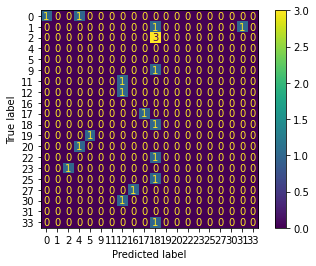

In [248]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [249]:
import joblib
import re
import string

In [295]:
joblib.dump(knn, "nb.joblib")
joblib.dump(vectorizer, "vec.joblib")

['vec.joblib']

In [297]:
nb_saved = joblib.load("nb.joblib")
vec_saved = joblib.load("vec.joblib")


sample_text = ["biology premed knowledge provides"]
# Process the text in the same way you did when you trained it!
sample_vec = vec_saved.transform(sample_text)
nb_saved.predict(sample_vec)

array([12])

In [287]:
import pickle


In [288]:
file = open('vectorizer.pickle','wb')
pickle.dump(vectorizer, file)
file.close()

file = open('Sentiment-LR.pickle','wb')
pickle.dump(knn, file)
file.close()

In [289]:
def load_models():
    '''
    Replace '..path/' by the path of the saved models.
    '''
    # Load the vectoriser.
    file = open('vectorizer.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('Sentiment-LR.pickle', 'rb')
    knn = pickle.load(file)
    file.close()
    # Load the SVC Model.
    return vectoriser, knn
 

In [290]:
def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectoriser.transform(remove_stop_words(text))
    l = model.predict(textdata)

    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, l):
        data.append((text,pred))

    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','l'])
    # df = df.replace([0,1], ["Not Toxic","Toxic"])
    return df



In [291]:
# if __name__=="__main__":
#     # Loading the models.
#     #vectoriser, LRmodel = load_models()

#     # Text to classify should be in a list.
#     text = ['biology premed knowledge']

#     df = predict(vectorizer, model, text)
#     print(df.head())

In [302]:
sample_dataset = ['biology provides premed knowledge interest major', 'probelm solving mathematical concept', 'Job Demand get make network get many job option graduation', 'Instructors and flexibility']

knn.predict(vectorizer.transform(sample_dataset))

array([ 2,  1, 22, 11])